# Single and Multilayer Perceptrons

In this tutorial we will discuss about the perceptron algorithm and the network of perceptrons, the so-called Multilayer Perceptron (MLP).

We will be discussing the following topics in this tutorial:

1. McCulloch-Pitts neuronal model
2. Sinlge-layer perceptron
3. Activation functions
4. Training a perceptron
5. Multi-layer Perceptrons (MLPs)

# Set up python

In [8]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

# McCulloch-Pitts (MP) neuronal model

Our brain has approximately 86 billion neurons. Among other functions, neurons help us to make decisions. We are repeatedly making decisions, such as "Whether I should go to the cinema or study?", "Whether to watch a football match or not".

Our decisions are often of the boolean form, i.e., "Yes" or "No", 0 or 1. We also take into account various factors (often boolean as well) before arriving at a decision.

[Warren McCulloch and Walter Pitts (1943)](https://link.springer.com/article/10.1007/BF02478259): pioneers to formally define neurons as computational elements. The so-called Artificial Neuron immitates the functionality of a biological neuron.

Their idea was explore simplified neural models to get the essence of neural processing by ignoring irrelevant details and focusing in what is needed to do a
computational task.

* They knew that spikes (action potentials) somehow carry information through the brain.
* Each spike would represent a binary 1, each lack of spike would represent
a binary 0.
* An artificial neuron accepts binary inputs and produces a binary output based on a certain threshold value which can be adjusted.
* They showed how spikes could be combined to do logical and arithmetical operations.
* This can be mainly used for _classification_ problems.

# MP neurons: details

MP neurons are binary: take an input and produce as output only 0’s or 1’s.

**Rule**: activations from other neurons (inputs) are aggregated (summed) at the
neuron soma and outputs 1 if threshold is reached and 0 if not.

<figure>
<p align='center'><img src='https://raw.githubusercontent.com/spirosChv/imbizo2023/main/figures/MP_neuron_math.png'/></p>
</figure>

* MP neuron received binary inputs $→$ **dendrites**
* The inputs are linearly summed $→$ **soma**
* If the summation passed a threshold $\theta$ the neuron emits a spike (i.e., 1), otherwise not (i.e., 0) $→$ **axon**
* The threshold ($\theta$) is a hyperparameter arbitrary chosen for a given task.


# Thresholding function aka Heaviside step function

The Heaviside step function, or the unit step function, usually denoted by $H$ or $\theta$ (but sometimes $u$, $1$ or 𝟙), is a step function, named after Oliver Heaviside (1850–1925), the value of which is zero for negative arguments and one for positive arguments.

\begin{equation}
H(x) := \begin{cases} 
      1 & x\geq 0 \\
      0 & x < 0 
      \end{cases}
\end{equation}

A more generic form contains also the parameter $\theta$, which is the threshold above which the function returns 1.

\begin{equation}
H(x;\theta) := \begin{cases} 
      1 & x\geq \theta \\
      0 & x < \theta 
      \end{cases}
\end{equation}

Let's implement the Heaviside function!

In [9]:
def heaviside(x, theta):
  return x if x >= theta else 0

Let's try our function with arbitrary $x$ and $\theta$ values!

In [10]:
x = 1.0 # @param {type:"number"}
theta = 2  # @param {type:"number"}

print(f"For x={x} and theta={theta} the output is {heaviside(x, theta)}!")

For x=1.0 and theta=2 the output is 0!


What if $x$ is a vector?

In [11]:
def heaviside(x, theta=0):
  return np.where(x >= theta, 1, 0)

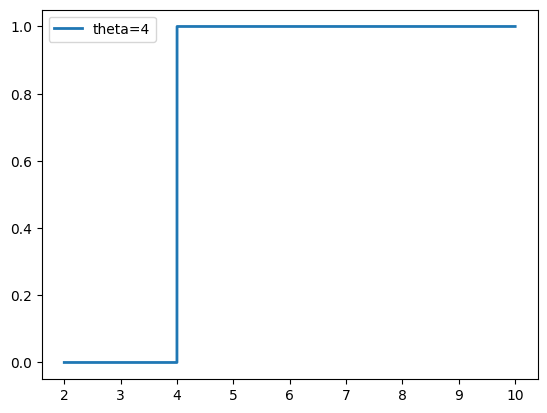

In [12]:
# @title Explore the threshold $\theta$

# @markdown `alpha` and `beta` denote the range of the input vector!

alpha = 2  # @param {type:"number"}
beta = 10  # @param {type:"number"}
theta = 4  # @param {type:"number"}

N = (beta - alpha)*1000  # number of points used
x = np.linspace(alpha, beta, N)  # create the input vector
y = heaviside(x, theta)

plt.figure()
plt.plot(x, y, label=f'theta={theta}', linewidth=2)
plt.legend()
plt.show()

# Case Study: Logical Operations with Perceptrons

A **logical operation** is a special symbol or word that connects two or more phrases of information. It is often used to test whether a certain relationship between the phrases is *true* or *false*.

Practically, a logic gate receives binary inputs (*true* or *false*, 0 or 1) and returns a binary output (*true* or *false*, 0 or 1). We will examine the solution of some logical operations with two inputs, i.e., $x_1$ and $x_2$.

## The AND logical operation

The AND logic operation returns *true* only if and only if either of its inputs are *true*. If either of the inputs is *false*, then returns *false*.

| $x_1$    | $x_2$    |  AND    |
| :----:   | :----:   | :----:  |
| $0$      | $0$      |   $0$   |
| $0$      | $1$      |   $0$   |
| $1$      | $0$      |   $0$   |
| $1$      | $1$      |   $1$   |


Choose a $\theta$ value such that AND operator will be solved.

In [13]:
x1 = 0  # @param {type:"number"}
x2 = 0  # @param {type:"number"}
theta = None  # @param {type:"number"}

print(f"The ouput is {heaviside(x1+x2, theta)}")

TypeError: ignored

## The OR logical operation

The OR logic operation returns *true* only if and only if at least one of its inputs are *true*. If neither of the inputs are *true*, then returns *false*.

| $x_1$    | $x_2$    |  OR    |
| :----:   | :----:   | :----:  |
| $0$      | $0$      |   $0$   |
| $0$      | $1$      |   $1$   |
| $1$      | $0$      |   $1$   |
| $1$      | $1$      |   $1$   |


Choose a $\theta$ value such that OR logical operation will be solved.

In [ ]:
x1 = 1  # @param {type:"number"}
x2 = 1  # @param {type:"number"}
theta = None  # @param {type:"number"}

print(f"The ouput is {heaviside(x1+x2, theta)}")

## The XOR logical operation

The XOR (exclusive OR) logic operation returns *true* if and only if one of its inputs is *true*. If both inputs are *false* or both are *true*, then returns *false*.

| $x_1$    | $x_2$    |  OR    |
| :----:   | :----:   | :----:  |
| $0$      | $0$      |   $0$   |
| $0$      | $1$      |   $1$   |
| $1$      | $0$      |   $1$   |
| $1$      | $1$      |   $0$   |

Choose a  θ  value such that OR logical operation will be solved.

In [ ]:
x1 = 1  # @param {type:"number"}
x2 = 1  # @param {type:"number"}
theta = None  # @param {type:"number"}

print(f"The ouput is {heaviside(x1+x2, theta)}")

# MP neuron limitations

* Boolean inputs ($x_i$).
* Boolean outputs ($y$).
* Threshold $\theta$ can take only a few possible values.
* All the inputs to the model have equal weights.

Thus, MP neuron is capable of only solving very specific tasks! So, what we can do to improve this abstraction?

# Perceptron (The idea)

Overcoming the limitations of the MP neuron, Frank Rosenblatt, an
American psychologist, proposed the classical perceptron model, the
mighty artificial neuron, in 1958 (Rosenblatt, 1958).

* Each input (xi ) is associated with a weight ($w_i$)
* Bias ($b$): shifts the decision boundary away from the origin and does not depend on any input value
* It is more generalized computational model than the MP neuron, where weights,
and bias can be learnt over time.

# Perceptron (forward pass)

<figure>
<p align='center'><img src='https://raw.githubusercontent.com/spirosChv/imbizo2022/main/exercises/figs/perceptron.png'/></p>
</figure>

We can visually understand the Perceptron by looking at the above image. For every training example, we first take the dot product of input features and parameters. Then, we apply the Unit Step Function to make the prediction ($\hat{y}$).

And if the prediction is wrong or in other words the model has misclassified that example, we make the update for the parameters. We don’t update when the prediction is correct (or the same as the true/target value $y$).

Let’s see what the update rule is.

\begin{equation}
\hat{y} = f \left( \sum_{i=1}^{D}w_i \cdot x_i + b \right)
\end{equation}

In matrix notation, we can use the dot product and get rid the summation!

\begin{equation}
\hat{y} = f \left( \text{x}^{\text{T}} \text{w} + b \right)
\end{equation}

where $f(\cdot)$ denotes the activation function.

Let's now implement the forward pass through the Perceptron.

In [14]:
class Perceptron:

  def __init__(self, input_size, activation_function):
    self.weights = np.array([0.0] * input_size).reshape(1, -1)
    self.bias = 0.0
    self.activation_function = activation_function

  def forward(self, input_vector):
    pre_activation = self.weights @ input_vector.T + self.bias
    return self.activation_function(pre_activation)

In [15]:
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

In [16]:
perceptron = Perceptron(x.shape[1], heaviside)

In [17]:
perceptron.forward(x)

array([[1, 1, 1, 1]])

## Training Perceptrons with Gradient Descent

### Loss Functions
To teach the perceptron to recognize a specific input pattern (e.g., pictures of cats), we show it a bunch of pictures and tell it whether each picture is a cat or not (supervised learning). The perceptron tries to guess whether each picture is a cat or not based on the numbers it receives, but it doesn't always get it right.

The **loss function** is like a scorekeeper that tells you how well the perceptron is doing a specific input pattern. Every time the perceptron makes a mistake, the scorekeeper gives it a *point* (or a *loss*). Your goal is to make the scorekeeper's score as low as possible by adjusting the perceptron's trainable parameters, i.e., the weights and the bias. The trainable parameters are like the settings inside the perceptron that determine how it works. By minimizing the scorekeeper's score, you can teach the perceptron to become better at recognizing this specific input pattern.

### Gradient Descent
To update the weights of a perceptron given some data and loss function, we use the **Gradient Descent** algorithm.

**Gradient Descent** is an iterative, first-order gradient optimization algorithm. At first, the weights are randomly initialized, then the optimization algorithm takes repeated steps in the opposite direction of the gradient until it reaches a "satisfactory condition".

<figure>
<p align='center'><img src='https://raw.githubusercontent.com/spirosChv/imbizo2023/main/figures/gradient_descent.gif'/></p>
</figure>

The **Gradient Descent** equation can be encapsulated in the following equation:

\begin{equation}
p_{new} = p_{old} - \eta \nabla_p \mathcal{L}(p_{old})
\end{equation}

where $\nabla_p$ denotes the partial derivative of some function $f$ with respect to variable $p$, and $\eta$ denotes the learning rate.


In summary, **Gradient Descent** method’s steps are:

1. choose a starting point (initialisation)
2. calculate gradient at this point
3. make a scaled step in the opposite direction to the gradient (objective: minimise)
4. repeat steps 2 and 3 until one of the criteria is met (i.e., convergence):
  * maximum number of iterations reached
  * step size is smaller than the tolerance (due to scaling or a small gradient)

### Impact of the learning rate

The animation below shows steps taken by the GD algorithm for learning rates of 0.1 and 0.8. For small learning rates, as the algorithm approaches the minimum the steps are getting gradually smaller. For a bigger learning rate, it is jumping from one side to another before converging.

<figure>
<p align='center'><img src='https://raw.githubusercontent.com/spirosChv/imbizo2023/main/figures/gradient_descent_2.gif'/></p>
</figure>


# Gradient descent and Perceptron

The perception update rule is very similar to the Gradient Descent update rule. The following is the update rule:

\begin{equation}
w_j := w_j + \eta \left( y^{[i]} - \phi(x^{[i]}) \right)x^{[i]}_j
\end{equation}

where $j \in [1, D]$, and $i \in [1, N]$, $D$ denotes the number of features (dimensionality of each data), $N$ the number of samples, and $\eta$ the learning rate.

<br>

**Note:** Even though the Perceptron algorithm may look similar to logistic regression, it is actually a very different type of algorithm, since it is difficult to endow the perceptron’s predictions with meaningful probabilistic interpretations, or derive the perceptron as a maximum likelihood estimation algorithm.

<br>

**Math behind the perceptron algorithm:**

We can distinguish the information flow into two phases:
- forward pass (black arrows)
- backward pass (red arrows)

<figure>
<p align='center'><img src='https://raw.githubusercontent.com/spirosChv/imbizo2022/main/exercises/figs/graph_.png'/></p>
</figure>


During the forward pass, we calculate the activation of the output node ($\hat{y}$).

\begin{align}
z_i^{[j]} &= \sum_{i=1}^{D}w_ix_i^{[j]} + b \\
\hat{y}^{[j]} &= \phi \left( z_i^{[j]} \right)
\end{align}

where $i$ denotes the features, and $j$ the samples.

Then, we calculate a loss $\mathcal{L}$ (i.e., error) between our prediction $\hat{y}$ and the real target value $y$.

Here, we will use the squared error defined as:

\begin{equation}
\mathcal{L}(y, \hat{y}; w, b) = \left( y - \hat{y} \right)^2 = \left( y -  \phi \left( z_i^{[j]} \right) \right)^2 = \left( y - \phi \left( \sum_{i=1}^{D}w_ix_i^{[j]} + b\right) \right)^2
\end{equation}

In mathematics, a way to find the optimum (i.e., maximum or minimum) of any function with respect to a parameter is to calculate its derivative with respect to this parameter and try to minimize (or maximize) it. In our case, as we want to minimize the error between our predictions and the real target values, we will perform a minimization. Our parameters are the weights $w_i$ and the bias $b$.

Our aim is to calculate the partial derivatives with respect to the parameters. We are going to use the chain rule, which is a formula that expresses the derivative of the composition of two differentiable functions $f$ and $g$ in terms of the derivatives of $f$ and $g$.

If a variable $z$ depends on the variable $y$, which itself depends on the variable $x$ (that is, $y$ and $z$ are dependent variables), then $z$ depends on $x$ as well, via the intermediate variable $y$. In this case, the chain rule is expressed as

\begin{equation}
\frac{dz}{dx} = \frac{dz}{dy} \frac{dy}{dx}
\end{equation}

During the backword pass, we apply the chain rule, as we want to find the $\frac{\partial{\mathcal{L}}}{\partial{w_i}}$, and $\frac{\partial{\mathcal{L}}}{\partial{b}}$.

\begin{align}
\frac{\partial{\mathcal{L}}}{\partial{w_i}} &= \frac{\partial{\mathcal{L}}}{\partial{\hat{y}}} \frac{\partial{\hat{y}}}{\partial{w_i}} = \frac{\partial{\mathcal{L}}}{\partial{\hat{y}}} \frac{\partial{\hat{y}}}{\partial{z_i}}\frac{\partial{z_i}}{\partial{w_i}} = -2(y-\hat{y}) \phi'(z_i)x_i \\ \\
\frac{\partial{\mathcal{L}}}{\partial{b}} &= \frac{\partial{\mathcal{L}}}{\partial{\hat{y}}} \frac{\partial{\hat{y}}}{\partial{b}} = -2(y-\hat{y})
\end{align}

Let's modify the thresholding function to account for its derivative as well!

In [18]:
def thresholding(x, theta=0, derivative=False):
  if derivative:
    return np.ones_like(x)
  return np.where(x >= theta, 1, 0)

Let's define an error function and its corresponding derivative. We are going to use the squared error, which is a convenx function, i.e., it has a global minimum!

In [19]:
def squared_error(target, prediction, derivative=False):
  if derivative:
    return -2*(prediction - target)
  return np.square(prediction - target)

Here, we are going to add a function in our class that implements the training of our parameters, i.e., weights and bias.

In [20]:
class Perceptron:

  def __init__(self, input_size, activation_function, loss_function):
    self.weights = np.array([0.0] * input_size).reshape(1, -1)
    self.bias = 0.0
    self.activation_function = activation_function
    self.loss_function = loss_function

  def forward(self, input_vector, theta=0):
    pre_activation = self.weights @ input_vector.T + self.bias
    return self.activation_function(pre_activation)

  def train(self, inputs, targets, learning_rate, num_epochs):
    self.loss = []
    for epoch in tqdm(range(num_epochs)):
      # loop over all training examples
      error = 0
      for i in range(len(inputs)):
        # forward pass
        prediction = self.forward(inputs[i])

        # compute the error signal
        error += self.loss_function(prediction, targets[i])

        # compute the gradient of the loss
        grad_loss = self.loss_function(prediction, targets[i], derivative=True)

        # compute gradient of activation function
        grad_act_function = self.activation_function(prediction, derivative=True)

        # update the weights and bias

        self.weights -= learning_rate * grad_loss * grad_act_function * inputs[i]
        self.bias -= learning_rate * grad_loss * grad_act_function

      self.loss.append(error/len(inputs))  # average loss w.r.t number of samples

In [21]:
x = np.array([[0, 0],
              [1, 0],
              [0, 1],
              [1, 1]])

perc = Perceptron(x.shape[1], thresholding, squared_error)

y = np.array([0, 0, 0, 1])
perc.train(x, y, learning_rate=0.01, num_epochs=50)

100%|██████████| 50/50 [00:00<00:00, 3422.41it/s]


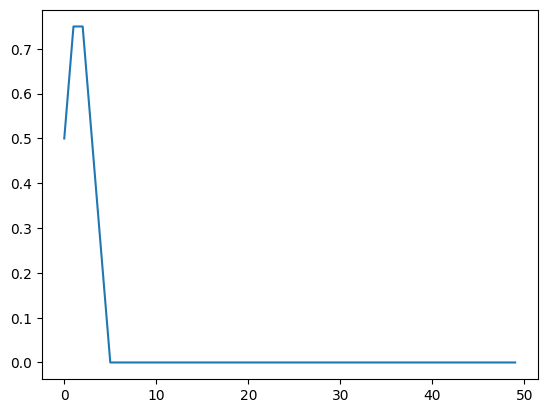

In [22]:
plt.plot(range(50), perc.loss)

XOR failure with single perceptron 
MLP basic intuition  (chain rule)

## Activation functions

Up until now, we have been using only the thresholding function. To appromixate more interesting functions, we will need to look into non-linear activation functions, namely the **Sigmoid**, **tanh** and **Rectified Linear Unit (ReLU)** activation functions.

The equations that describe these functions are given below.

1. The Sigmoid function
\begin{equation}
f(x) = \sigma(x) = \frac{1}{1 + e^{-x}}
\end{equation}

2. The hyperbolic tangent (tanh) function
\begin{equation}
f(x) = \tanh(x) = \frac{e^x-e^{-x}}{e^x + e^{-x}}
\end{equation}

3. The Rectified Linear Unit (ReLU)
\begin{equation}
f(x) = \text{ReLU}(x) = 
  \begin{cases} 
      x & x\geq 0 \\
      0 & x < 0 
  \end{cases}
\end{equation}


In [23]:
# Define activation functions
def sigmoid(x, derivative=False):
    if derivative:
        return sigmoid(x) * (1 - sigmoid(x))
    return 1 / (1 + np.exp(-x))

def tanh(x, derivative=False):
    if derivative:
        return 1 - np.square(tanh(x))
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def relu(x, derivative=False):
    if derivative:
        return np.where(x >= 0, 1, 0)
    return np.maximum(x, 0)

# Initialization

Up to now, we have used an initialization of all trainable parameters to zero. Another option is to use a random initialization!

```python
class Perceptron:

  def __init__(self, input_size, activation_function, loss_function):
    self.weights = np.random.randn(input_size)
    self.bias = np.random.randn(1)
    self.activation_function = activation_function
    self.loss_function = loss_function
```

# More complex dataset

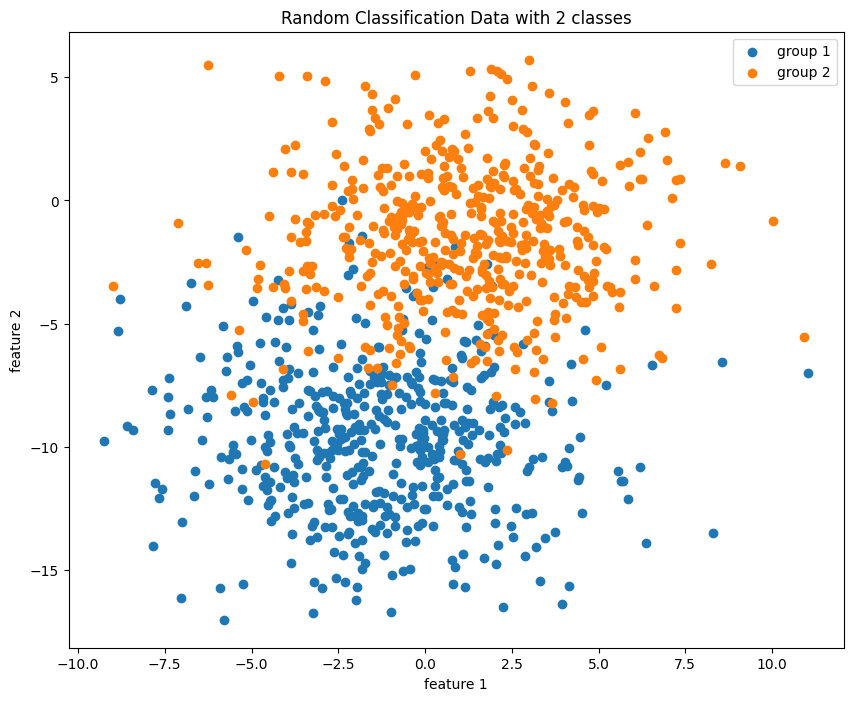

In [24]:
num_classes = 2
std = 3
d = 2
X, y = datasets.make_blobs(n_samples=1000, n_features=d,
                           centers=num_classes, cluster_std=std,
                           random_state=2)
# Plotting
fig = plt.figure(figsize=(10, 8))
for i in range(num_classes):
  plt.scatter(X[:, 0][y == i], X[:, 1][y == i], label=f'group {i+1}')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')
plt.legend()
plt.show()

In [25]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,
                                                random_state=0)

In [30]:
# @title Draw boundary line - function
def plot_decision_boundary(data, labels, num_classes,weights, bias):
  plt.figure(figsize=(10, 8))
  # compute slope and intercept of decision boundary line
  slope = -weights[0] / weights[1]
  intercept = -bias / weights[1]
  # define range of x values to plot
  x_min, x_max = data.min(), data.max()
  x_values = np.linspace(x_min, x_max, 2)
  # compute corresponding y values
  y_values = slope * x_values + intercept

  for i in range(num_classes):
    plt.scatter(data[:, 0][labels == i], data[:, 1][labels == i], label=f'group {i+1}')
  # plot decision boundary line
  plt.plot(x_values, y_values, 'k--')
  # plt.fill_between(x_values, y_values, alpha=0.1)
  plt.xlabel("feature 1")
  plt.ylabel("feature 2")
  plt.title('Decision Boundary')
  plt.legend()
  plt.show()

In [27]:
class Perceptron:

  def __init__(self, input_size, activation_function, loss_function):
    self.weights = np.array([0.0] * input_size).reshape(1, -1)
    self.bias = 0.0
    self.activation_function = activation_function
    self.loss_function = loss_function

  def forward(self, input_vector, theta=0):
    pre_activation = self.weights @ input_vector.T + self.bias
    return self.activation_function(pre_activation, theta)

  def train(self, inputs, targets, learning_rate, num_epochs):
    self.loss = []
    for epoch in tqdm(range(num_epochs)):
      # loop over all training examples
      error = 0
      for i in range(len(inputs)):
        # forward pass
        prediction = self.forward(inputs[i])

        # compute the error signal
        error += self.loss_function(prediction, targets[i])

        # compute the gradient of the loss
        grad_loss = self.loss_function(prediction, targets[i], derivative=True)

        # compute gradient of activation function
        grad_act_function = self.activation_function(prediction, derivative=True)

        # update the weights and bias

        self.weights -= learning_rate * grad_loss * grad_act_function * inputs[i]
        self.bias -= learning_rate * grad_loss * grad_act_function

      self.loss.append(error/len(inputs))  # average loss w.r.t number of samples
  
  def evaluate(self, inputs, labels):
    ypred = []
    for i in range(len(inputs)):
      prediction = self.forward(inputs[i])
      ypred.append(1 if prediction >= 0.5 else 0)

    self.accuracy = np.sum(np.abs(ypred - labels) == 0)/len(labels)

100%|██████████| 50/50 [00:01<00:00, 28.01it/s]


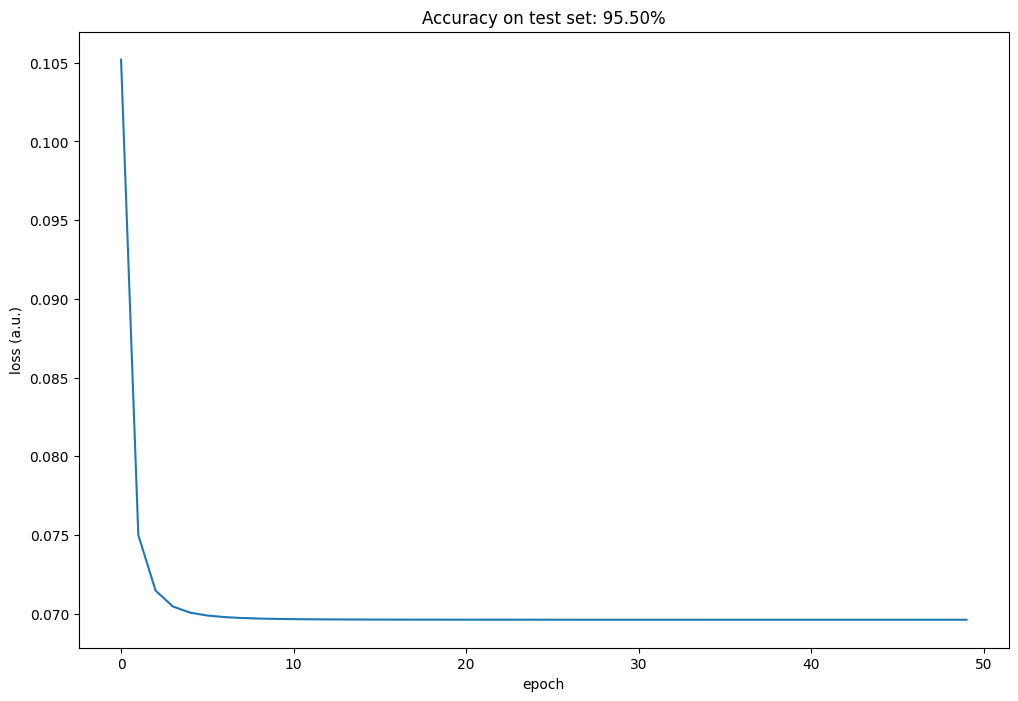

In [28]:
perc = Perceptron(2, sigmoid, squared_error)
perc.train(Xtrain, ytrain, learning_rate=0.1, num_epochs=50)

perc.evaluate(Xtest, ytest)

plt.figure(figsize=(12, 8))
plt.plot(range(len(perc.loss)), perc.loss)
plt.xlabel('epoch')
plt.ylabel('loss (a.u.)')
plt.title(f"Accuracy on test set: {perc.accuracy*100:.2f}%")
plt.show()

In [31]:
plot_decision_boundary(X, y, 2, perc.weights, perc.bias)

IndexError: ignored

<Figure size 1000x800 with 0 Axes>

# What is a Multi-Layer Perceptron?

As you know our brain is made up of millions of neurons, so a Neural Network is really just a composition of Perceptrons, connected in different ways and operating on different activation functions.

* __Input Nodes__ — The Input nodes provide information from the outside world to the network and are together referred to as the “Input Layer”. No computation is performed in any of the Input nodes — they just pass on the information to the hidden nodes.

* __Hidden Nodes__ — The Hidden nodes have no direct connection with the outside world (hence the name “hidden”). They perform computations and transfer information from the input nodes to the output nodes. A collection of hidden nodes forms a “Hidden Layer”. While a network will only have a single input layer and a single output layer, it can have zero or multiple Hidden Layers. A Multi-Layer Perceptron has one or more hidden layers.

* __Output Nodes__ — The Output nodes are collectively referred to as the “Output Layer” and are responsible for computations and transferring information from the network to the outside world.

## Mean Squared Error (MSE) as a loss function

\begin{equation}
\mathcal{L} = \frac{1}{m}\sum_{i=1}^{m} \left( \hat{y_i} - y_i  \right)^2
\end{equation}

## Softmax activation function
The softmax function takes as input a vector $x$ of $D$ real numbers, and normalizes it into a probability distribution consisting of $D$ probabilities proportional to the exponentials of the input numbers. That is, prior to applying softmax, some vector components could be negative, or greater than one; and might not sum to 1; but after applying softmax, each component will be in the interval [0, 1], and the components will add up to 1, so that they can be interpreted as probabilities. Furthermore, the larger input components will correspond to larger probabilities.

\begin{equation}
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^D e^{x_j}}
\end{equation}

In [32]:
from keras.datasets import mnist
from keras.utils import np_utils
# Load the data
(x_all, y_all), (x_test, y_test) = mnist.load_data()

# Normalize the data and split in: train / validation / test sets
x_all = x_all.astype('float32')
x_all /= 255

# Train set
N = 2000
x_train = x_all[:N]
y_train = y_all[:N]
x_train = x_train.reshape(len(x_train), -1)
y_train = np_utils.to_categorical(y_train)

# Validation set
x_val = x_all[2000:3000]
y_val = y_all[2000:3000]
x_val = x_val.reshape(len(x_val), -1)
y_val = np_utils.to_categorical(y_val)

# Test set
x_test = x_test.astype('float32')
x_test /= 255
x_test = x_test.reshape(len(x_test), -1)
y_test = np_utils.to_categorical(y_test)

11490434/11490434 [==============================] - 0s 0us/step


In [73]:
class MLP:

  def __init__(self, input_size, hidden_size, activation_function, loss_function):
    self.weights_h = np.zeros((hidden_size, input_size))  # to randn
    self.weights_o = np.zeros((1, hidden_size))
    self.bias_h = 0.0
    self.bias_o = 0.0
    self.activation_function = activation_function
    self.loss_function = loss_function

  def forward(self, w, b, x):
    z = w @ x + b
    a = self.activation_function(z)
    return z, a

  def train(self, inputs, targets, learning_rate, num_epochs):
    self.loss = []
    for epoch in tqdm(range(num_epochs)):
      # loop over all training examples
      error = 0
      for i in range(len(inputs)):
        # forward pass
        z1, a1 = self.forward(self.weights_h, self.bias_h, inputs[i])
        z2, a2 = self.forward(self.weights_o, self.bias_o, a1)

        # compute the error signal
        error += self.loss_function(a2, targets[i])

        # compute the gradient of the loss
        grad_loss = self.loss_function(a2, targets[i], derivative=True)

        # compute gradient of activation function
        grad_act_function = self.activation_function(a2, derivative=True)

        # derivative of z_o
        dz_o = grad_loss * grad_act_function
        # update the weights and bias
        self.weights_o -= learning_rate * dz_o * a1.T
        self.bias_o -= learning_rate * dz_o

        dz_h = (self.weights_o.T @ dz_o) * self.activation_function(z1, derivative=True)
        # update the weights and bias
        self.weights_h -= learning_rate * dz_h * inputs[i].T
        self.bias_h -= learning_rate * dz_h

      self.loss.append(error/len(inputs))  # average loss w.r.t number of samples
  
  def evaluate(self, inputs, labels):
    ypred = []
    for i in range(len(inputs)):
      z1, a1 = self.forward(self.weights_h, self.bias_h, inputs[i])
      z2, a2 = self.forward(self.weights_o, self.bias_o, a1)
      print(a2.shape)
      ypred.append(1 if a2 >= 0.5 else 0)

    self.accuracy = np.sum(np.abs(ypred - labels) == 0)/len(labels)

In [74]:
# Create the Network
model = MLP(2, 2, thresholding, squared_error)

In [77]:
# Train the model
x = np.array([[0, 0],
              [1, 0],
              [0, 1],
              [1, 1]])

y = np.array([0, 1, 1, 0])
output = model.train(x,y,0.1,100)

100%|██████████| 100/100 [00:00<00:00, 2366.90it/s]


In [78]:
model.evaluate(x, y)

(1,)
(1,)
(1,)
(1,)


ADD PYTORCH